In [1]:
import networkx as nx
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

Occupational mobility patterns refer to the movement of individuals across different occupations over a specific period of time. Understanding these patterns can be crucial for policymakers, as it sheds light on labor market dynamics and can inform strategies related to education, workforce training, and economic development.

1. Most Common Pathways for Occupational Transitions:
Pathways for occupational transitions represent the sequences of job changes individuals go through during their career. Analyzing the dataset can reveal the most common sequences of transitions. This involves identifying pairs or sequences of occupations that occur frequently.
Methodology: Common approaches include counting the frequency of each transition and identifying the top pathways. Visualization tools, such as Sankey diagrams or flowcharts, can be employed to represent these pathways graphically.
Implications: Identifying the most common pathways can offer insights into typical career trajectories, helping policymakers and educators understand prevalent routes within the labor market.
2. Clusters or Communities of Occupations:
Definition: Clusters or communities in occupational mobility represent groups of occupations that frequently transition among themselves but have fewer connections with occupations outside the group.
Analysis: Network analysis techniques can be applied to identify clusters or communities. In the context of the network dataset, occupations are nodes, and transitions between them are edges.
Community Detection Algorithms: Algorithms like Louvain, Girvan-Newman, or modularity optimization can be used to identify these groups of occupations.
Visualization: Network visualization tools, such as Gephi or NetworkX, can help display the identified clusters and their internal connections.
Interpretation: Understanding these clusters can provide valuable information about occupational ecosystems, highlighting areas where certain skill sets are more interchangeable and showcasing the interconnectedness of specific occupations.
Potential Research Questions:
How do the most common pathways for occupational transitions differ across demographic groups (age, gender, education level)?
Are there specific industries or sectors that act as hubs for occupational mobility, facilitating transitions across multiple occupations?
Do certain occupations serve as "bridges" connecting distinct clusters or communities within the occupational network?
Practical Applications:
Educational Planning: Tailoring educational programs to support common career trajectories.
Labor Market Policy: Informing policies to address skills gaps or mismatches.
Career Counseling: Providing insights for career counselors to guide individuals in their career choices.
By exploring occupational mobility patterns and identifying clusters of occupations, stakeholders can gain valuable insights into the dynamics of the labor market, facilitating more informed decision-making in areas related to education, workforce planning, and economic development.

In [11]:
G  = pd.read_excel('/Users/jacopobinati/Desktop/labornetwork.xlsx')
G

,Source_cat,Source,Target_cat,Target,Weight
0,Management Occupation,20,Management Occupation,10,50
1,Management Occupation,40,Management Occupation,10,5
2,Management Occupation,50,Management Occupation,10,54
3,Management Occupation,60,Management Occupation,10,6
4,Management Occupation,100,Management Occupation,10,2
...,...,...,...,...,...
36692,"Installation, Maintenance, and Repair Workers",7010,Military Occupations,9840,3
36693,Production Occupation,7700,Military Occupations,9840,1
36694,Transportation Occupations,9140,Military Occupations,9840,2
36695,Material Moving Occupations,9510,Military Occupations,9840,1


In [12]:
H = nx.DiGraph()
H.add_edges_from(G[['Source', 'Target']].values)
pos = nx.spring_layout(H)
print(H.nodes, len(H.edges))
print(H.edges, len(H.edges))


[20, 10, 40, 50, 60, 100, 110, 120, 130, 140, 150, 160, 200, 210, 220, 230, 300, 310, 320, 340, 350, 410, 420, 430, 500, 510, 530, 540, 560, 620, 710, 730, 800, 810, 820, 840, 850, 910, 940, 950, 1000, 1010, 1020, 1040, 1060, 1100, 1110, 1220, 1300, 1360, 1400, 1410, 1420, 1430, 1460, 1520, 1530, 1550, 1560, 1600, 1650, 1700, 1800, 1810, 1820, 1960, 2000, 2010, 2020, 2040, 2060, 2100, 2140, 2200, 2300, 2310, 2320, 2330, 2340, 2430, 2540, 2550, 2600, 2630, 2700, 2720, 2760, 2810, 2820, 2850, 2860, 2900, 3010, 3050, 3060, 3120, 3130, 3160, 3220, 3300, 3310, 3400, 3410, 3530, 3540, 3600, 3630, 3650, 3710, 3730, 3740, 3800, 3820, 3850, 3910, 3920, 3950, 4010, 4020, 4030, 4050, 4060, 4110, 4200, 4210, 4220, 4230, 4250, 4300, 4320, 4340, 4510, 4530, 4540, 4600, 4610, 4620, 4650, 4700, 4710, 4720, 4740, 4760, 4800, 4810, 4820, 4840, 4850, 4920, 4940, 4960, 5000, 5110, 5120, 5160, 5230, 5240, 5260, 5310, 5330, 5360, 5400, 5410, 5520, 5530, 5550, 5600, 5610, 5620, 5700, 5840, 5860, 5910, 5930, 

In [13]:
labels_mapping = dict(zip(G['Source'], G['Source_cat']))
labels_mapping.update(dict(zip(G['Target'], G['Target_cat'])))

nx.set_node_attributes(H, labels_mapping, 'label')

pos = nx.spring_layout(H)

print("Number of nodes:", len(H.nodes))
print("Number of edges:", len(H.edges))

# Print the nodes and edges along with labels
print("Nodes:", H.nodes(data=True))
print("Edges:", H.edges)
print("Occupations:", G["Source_cat"].value_counts())
print("Occupations:", G["Target_cat"].value_counts())

Number of nodes: 503
Number of edges: 36697
Nodes: [(20, {'label': 'Management Occupation'}), (10, {'label': 'Management Occupation'}), (40, {'label': 'Management Occupation'}), (50, {'label': 'Management Occupation'}), (60, {'label': 'Management Occupation'}), (100, {'label': 'Management Occupation'}), (110, {'label': 'Management Occupation'}), (120, {'label': 'Management Occupation'}), (130, {'label': 'Management Occupation'}), (140, {'label': 'Management Occupation'}), (150, {'label': 'Management Occupation'}), (160, {'label': 'Management Occupation'}), (200, {'label': 'Management Occupation'}), (210, {'label': 'Management Occupation'}), (220, {'label': 'Management Occupation'}), (230, {'label': 'Management Occupation'}), (300, {'label': 'Management Occupation'}), (310, {'label': 'Management Occupation'}), (320, {'label': 'Management Occupation'}), (340, {'label': 'Management Occupation'}), (350, {'label': 'Management Occupation'}), (410, {'label': 'Management Occupation'}), (420, {

In [14]:
G['action'] = 'exit'
G.loc[G['Target_cat'].notnull(), 'action'] = 'entry'
G.loc[G['Target_cat'] == G['Source_cat'], 'action'] = 'no_change'

# Create a table showing the count of entries and exits for each job category
entry_exit_table = pd.crosstab(G['Target_cat'], G['action'])

print(entry_exit_table)

action                                              entry  no_change
Target_cat                                                          
Architecture and Engineering Occupations             1057        140
Arts, Design, Entertainment, Sports, and Media ...   1104         96
Building and Grounds Cleaning and Maintenance O...    933         14
Business and Financial Operations Occupations        1795        176
Community and Social Services Occupations             618         22
Computer and Mathematical Occupations                1016         63
Construction Trades                                  1987        362
Education Instruction, and Library Occupations       1393         80
Farming, Fishing, and Forestry Occupations            339         18
Food Preparation and Serving Related Occupations     1457        126
Healthcare Practitioners and Technical Occupations   1566        165
Healthcare Support Occupations                        556         14
Installation, Maintenance, and Rep

#Graph Visualisation

In [15]:
pos1= nx.spring_layout(H, seed=442)  # Seed for reproducibility

# Draw the graph with node labels using Force Atlas layout
nx.draw_networkx(H, pos1, with_labels=True)

# Set the title
plt.title('Graph Visualization with Force Atlas Layout')

# Show the plot
plt.show()

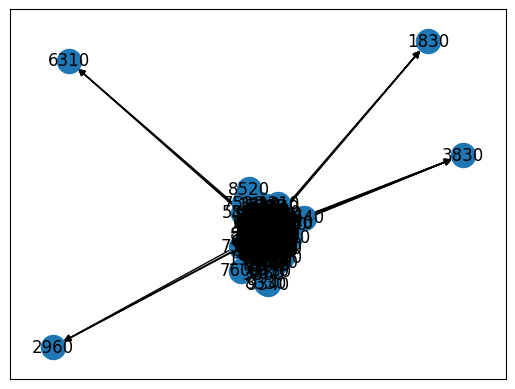

In [ ]:
nx.draw_networkx(H, pos, with_labels=True)
plt.show()


In [ ]:
import plotly.graph_objects as go
unique_categories = pd.concat([G['Source_cat'], G['Target_cat']]).unique()
categories_df = pd.DataFrame({'category': unique_categories, 'index': range(len(unique_categories))})

# Create indices for source and target categories
G = pd.merge(G, categories_df, left_on='Source_cat', right_on='category', how='left')
G = pd.merge(G, categories_df, left_on='Target_cat', right_on='category', how='left', suffixes=('_source', '_target'))

# Create a Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=categories_df['category']
    ),
    link=dict(
        source=G['index_source'],
        target=G['index_target'],
        value=G['Weight']
    )
)])

# Set layout options
fig.update_layout(title_text="Occupational Transitions - Sankey Diagram", font_size=10)
fig.show()


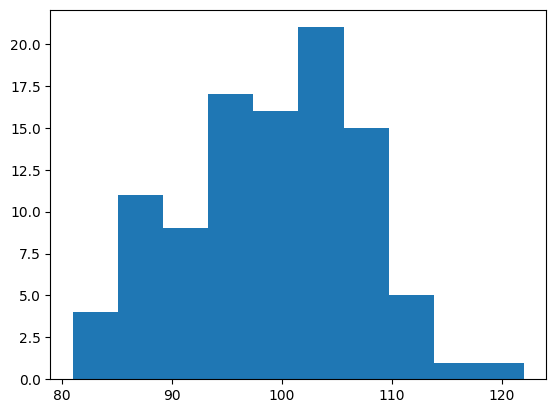

In [ ]:
def plot_degree_dist(H):
    degrees = [H.degree(n) for n in H.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    
    nodes = H.nodes()
    if in_degree:
        in_degree = dict(H.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(H.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in H.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

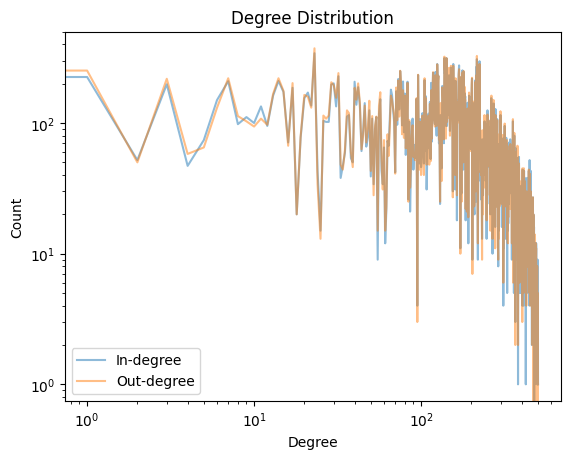

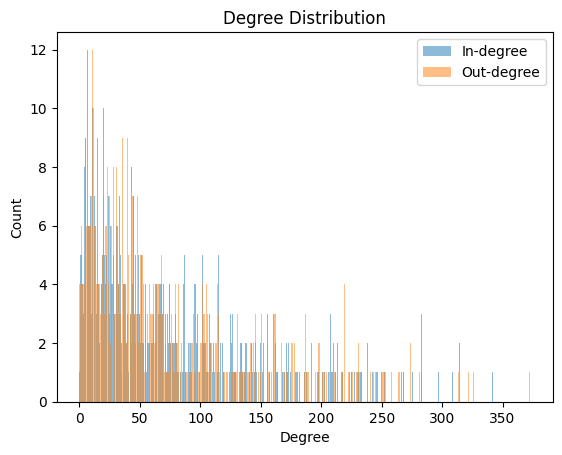

In [ ]:
in_degree = dict(H.in_degree())
out_degree = dict(H.out_degree())

# Plot in-degree and out-degree distributions
plt.loglog(list(in_degree.values()), alpha=0.5, label='In-degree')
plt.loglog(list(out_degree.values()), alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.legend()
plt.title('Degree Distribution')
plt.show()

plt.hist(list(in_degree.values()), bins=400, alpha=0.5, label='In-degree')
plt.hist(list(out_degree.values()), bins=400, alpha=0.5, label='Out-degree')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.legend()
plt.title('Degree Distribution')
plt.show()

/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_42963/2028461298.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go-" (-> color='g'). The keyword argument will take precedence.
  plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree', color = 'green')
/var/folders/6t/d3d0rh5d1rd426bk9g_mnhd00000gn/T/ipykernel_42963/2028461298.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree', color='red')


Text(0, 0.5, 'Frequency')

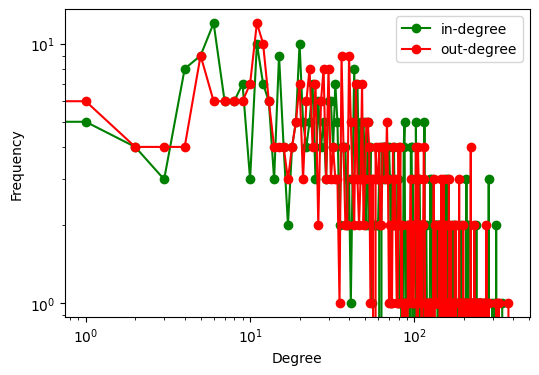

In [ ]:
in_degree_freq = degree_histogram_directed(H, in_degree=True)
out_degree_freq = degree_histogram_directed(H, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(6, 4)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree', color = 'green') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree', color='red')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')


In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(H)
betweenness_centrality = nx.betweenness_centrality(H)
closeness_centrality = nx.closeness_centrality(H)

for node in H.nodes:
    print(f"Node {node}: Degree Centrality - {degree_centrality[node]}, Betweenness Centrality - {betweenness_centrality[node]}, Closeness Centrality - {closeness_centrality[node]}")


Node 20: Degree Centrality - 0.8605577689243028, Betweenness Centrality - 0.0071063542834749645, Closeness Centrality - 0.6237776168055053
Node 10: Degree Centrality - 0.9501992031872509, Betweenness Centrality - 0.012318390996024617, Closeness Centrality - 0.6399376586916582
Node 40: Degree Centrality - 0.20318725099601592, Betweenness Centrality - 0.00026412849451249684, Closeness Centrality - 0.5135466450207485
Node 50: Degree Centrality - 0.8286852589641434, Betweenness Centrality - 0.006831081031127932, Closeness Centrality - 0.61831273155189
Node 60: Degree Centrality - 0.20916334661354583, Betweenness Centrality - 0.00015342531902127007, Closeness Centrality - 0.5077408761664545
Node 100: Degree Centrality - 0.27689243027888444, Betweenness Centrality - 0.00022876935303476354, Closeness Centrality - 0.529508973751297
Node 110: Degree Centrality - 0.5597609561752988, Betweenness Centrality - 0.0015781079510388092, Closeness Centrality - 0.5825847553183493
Node 120: Degree Central